In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

reloaded


SSRO calibration :  20160819/090407
max. F = (96.44 +/- 0.37)% at t=10 us
	ms_0 = (94.22 +/- 0.33)%
	ms_1 = (98.66 +/- 0.16)%


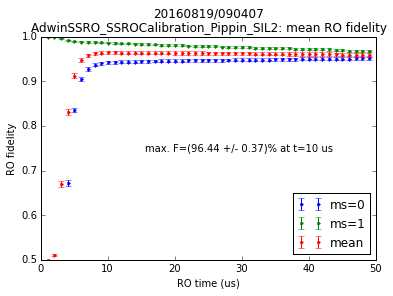

In [11]:
reload(ssro)
ssro.ssrocalib(plot_photon_ms0=False) 
#,folder = 'D:\measuring\data\20160126\180407_AdwinSSRO_SSROCalibration_Pippin_SIL1')
# print 'Threshold is 96.6'

ms0 0
msp1 1
msm1 -1
SSRO calibration :  20160824/130735
max. Fm = (94.79 +/- 0.44)% at t=8 us
	ms_0 = (93.58 +/- 0.35)%
	ms_1 = (96.00 +/- 0.28)%
max. Fp = (96.96 +/- 0.34)% at t=34 us
	ms_0 = (94.86 +/- 0.31)%
	ms_1 = (99.06 +/- 0.14)%
Job's done!


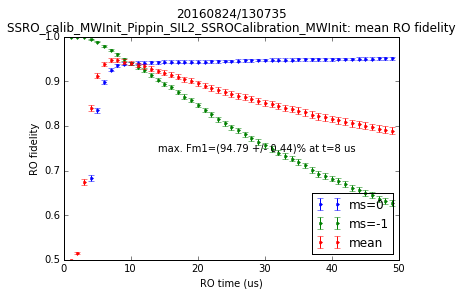

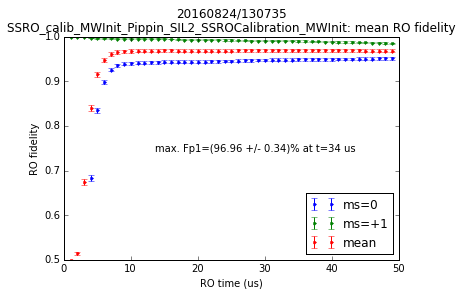

In [2]:
reload(ssro)
ssro.ssrocalib_MWInit(plot_photon_ms0=False)

# DARKESR

d:\measuring\data\20160728\115410_PulsarDarkESR_Pippin_SIL2
d:\measuring\data\20160728\115735_SSRO_calib_MWInit_Pippin_SIL2_SSROCalibration_MWInit
Converged with chi squared  0.194504200225
degrees of freedom, dof  146
RMS of residuals (i.e. sqrt(chisq/dof))  0.0364995965661
Reduced chisq (i.e. variance of residuals)  0.00133222054949

fitted parameters at minimum, with 68% C.I.:
 0 a              1.007849 +/-   0.005619
 1 A             -0.061994 +/-   0.009450
 2 sigma          0.000602 +/-   0.000104
 3 x0             4.048784 +/-   0.000080
 4 s1             0.002252 +/-   0.000067

correlation matrix:
               a         A         sigma     x0        s1        
         a  1.000000
         A -0.186202  1.000000
     sigma  0.430428  0.729685  1.000000
        x0  0.063075 -0.546116 -0.430374  1.000000
        s1  0.211390  0.081713  0.246741  0.043306  1.000000



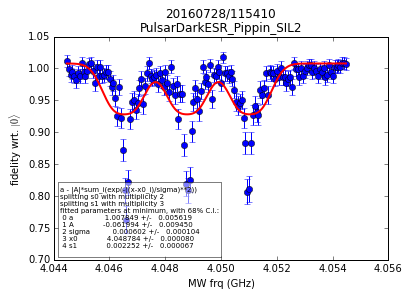

In [8]:
execfile(r'D:\measuring\analysis\scripts\espin\dark_esr_analysis_purification.py')

# Pi pulses

d:\measuring\data\20160821\102818_Pi_Calibration_Pippin_SIL2Pi
[ 0.0545  0.0395  0.014   0.0065  0.0085  0.0065  0.012   0.0245  0.0285
  0.0405  0.058   0.069 ]
min x =  0.642090909091
min y = 0.0018085106383
[ 0.0545  0.0395  0.014   0.0065  0.0085  0.0065  0.012   0.0245  0.0285
  0.0405  0.058   0.069 ]
min x =  0.642090909091
min y = 0.0018085106383
fitted infidelity 0.00371634708292
Fitted minimum at  0.708749021621


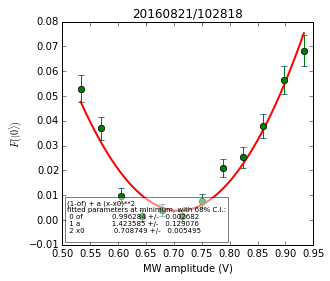

In [17]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi_Calibration')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.fit_parabolic(folder, x0_guess=0.72,a_guess=0,of_guess=0, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
#ax.set_ylim(0,1.)
print 'fitted infidelity', 1-fit['params'][0]
print 'Fitted minimum at ', fit['params'][2]

# Pi/2

[ 0.365  0.389  0.413  0.437  0.461  0.485  0.509  0.533  0.557  0.581
  0.605]
Converged with chi squared  0.00635683567225
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0265765888461
Reduced chisq (i.e. variance of residuals)  0.000706315074694

fitted parameters at minimum, with 68% C.I.:
 0 m             -2.571325 +/-   0.105582
 1 x0             0.479584 +/-   0.003124

correlation matrix:
               m         x0        
         m  1.000000
        x0 -0.071182  1.000000



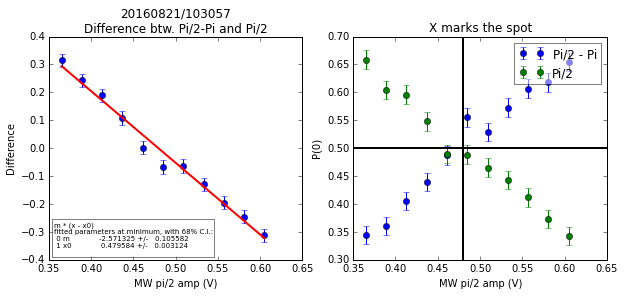

In [18]:
execfile(r'D:\measuring\analysis\scripts\espin\calibration_pi2_CORPSE.py')

#Electron T1

Converged with chi squared  0.0137462920113
degrees of freedom, dof  12
RMS of residuals (i.e. sqrt(chisq/dof))  0.033845595493
Reduced chisq (i.e. variance of residuals)  0.00114552433427

fitted parameters at minimum, with 68% C.I.:
 0 A              0.682761 +/-   0.017938
 1 tau        167262.102270 +/- 43771.515906

correlation matrix:
               A         tau       
         A  1.000000
       tau -0.835130  1.000000

minimal point: 25400.0


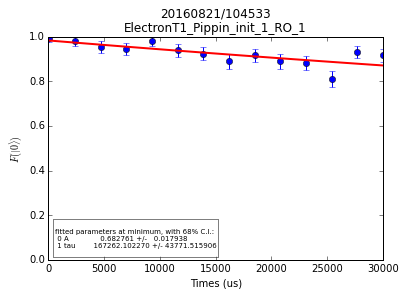

In [25]:
### no RO correction
from analysis.lib.fitting import fit
folder= tb.latest_data('ElectronT1')
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
a.get_electron_ROC()
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.0,1.0)
y = a.p0
p0,fitfunc,fitfunc_str = common.fit_exp_decay_with_offset(0.3,0.7,50e3)
fit_result = fit.fit1d(a.sweep_pts,y,None,p0=p0,fitfunc=fitfunc,do_print=True,fixed=[0],ret=True)
plot.plot_fit1d(fit_result,np.linspace(a.sweep_pts[0],a.sweep_pts[-1],100),ax=ax,plot_data=False)
print 'minimal point:',a.sweep_pts[np.argmin(a.normalized_ssro)]

# PM Sweep

[ 0.928  0.927  0.908  0.901  0.917  0.916  0.752  0.495  0.365  0.139
  0.089  0.077  0.058  0.059  0.059  0.07   0.056  0.064  0.064  0.054]
min x =  40.0
min y = 0.0421007867319


(0, 1.0)

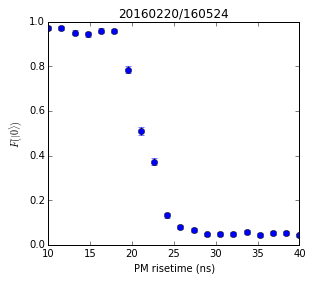

In [9]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('PMrisetime')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
#fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(0,1.)

# Theta pulse

d:\measuring\data\20160824\130325_Pi_Calibration_Pippin_SIL2theta
[ 0.3792  0.3798  0.367   0.3578  0.3428  0.3368  0.3224  0.316   0.2964
  0.312   0.2992  0.2778]
min x =  0.635
min y = 0.291577597264


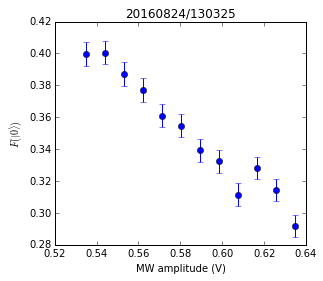

In [3]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('theta')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#ax.set_ylim(0.2,0.35)